# Numerical Data in Python

*2 hours*

**Contents:**

- Introducing NumPy
- Working with NumPy Arrays
- Calculations on NumPy Arrays
- Sorting and Filtering Arrays
- Reshaping Arrays
- Plotting with `matplotlib`

---

## Introducting NumPy

So far, we've been working with built-in Python data structures and functions. We've loaded data from some text files and worked with sequences of numbers. But most scientific datasets have more *structure* than we're able to represent with a CSV file. Many are also large enough that a CSV file isn't the best format to use.

Today, we'll introduce a powerful and widely used Python extension that is essential for working with numerical data. NumPy has been around for over 20 years and thousands of users have contributed code to the library. It's no exaggeration to say that NumPy is probably the most important Python library ever developed, as countless other libraries are built on top of NumPy.

In [1]:
import numpy as np

It's a strong convention to abbreviate the name of `numpy` to `np`.

**The key component of `numpy` is the `numpy.ndarray` data type,** or $n$-dimensional array.

In [2]:
arr = np.array([1, 2, 3])
arr

array([1, 2, 3])

If we compare the `ndarray` to the most similar built-in data structure, the `list`, we'll see some important differences.

In [3]:
np.array([1, True, 3])

array([1, 1, 3])

**First, unlike lists, `numpy` arrays can only hold one type of data.** There are multiple data types to choose from and every array has an explicitly defined type.

In [4]:
arr.dtype

dtype('int64')

In [5]:
np.array([3.14, 2.1]).dtype

dtype('float64')

**Second, a `numpy` array can have multiple dimensions, or axes,** whereas a `list` can only contain nested lists, which is a confusing way to try and represent more than one dimension.

In [6]:
xy = [[42.0, 45.5], [-118.1, -118.2]]
xy

[[42.0, 45.5], [-118.1, -118.2]]

In [7]:
arr = np.array(xy)
arr

array([[  42. ,   45.5],
       [-118.1, -118.2]])

We can index a `numpy` array just like other sequences. We'll learn more about this in a moment.

In [8]:
arr[0]

array([42. , 45.5])

In this example, it might make more sense to have the latitudes and longitudes in separate columns (instead of in rows). We can get a *transposed* copy of the array by typing:

In [9]:
arr.T

array([[  42. , -118.1],
       [  45.5, -118.2]])

In [10]:
arr.ndim

2

In [11]:
arr.shape

(2, 2)

You may be tempted to ask how many elements are in a `numpy` array...

In [12]:
# The WRONG way
len(arr)

2

In [13]:
# The correct way
arr.size

4

**Finally, operations on `numpy` arrays can be executed much more quickly and efficiently than on `lists`.** If you are working with numeric data of any size, you're much better off putting it in a `numpy` array than a `list` or `tuple`. This is especially true for very large datasets.

---

## Working with NumPy Arrays

For the rest of this lesson, we'll be working with [data on near-surface air temperatures from the NOAA Center for Climate Prediction (CPC).](http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.GHCN_CAMS/.gridded/.deg0p5/index.html) 

Though the CPC has the word "prediction" in its name, it also performs what are called *re-analyses,* where historical climate data are reproduced by combining weather station data with computer models. Here, we use a re-analysis of the past 75 years of air temperatures across the globe.

**I subset these data to the city of Algiers, Algeria.**

In [14]:
import pandas as pd

temps = pd.read_csv(
    'http://files.ntsg.umt.edu/data/GIS_Programming/data/NOAA_NCEP_CPC_gridded_deg0p5_1948-2022_Algiers.txt',
    header = None).to_numpy()

Again, a chief advantage of `numpy` arrays is their ability to represent multi-dimensional data. **What do we mean by multi-dimensional?**

A collection of data values can be *structured* in multiple ways...

- Time series data consist of values that is associated with a series of points in time.
- Spatial data consist of values that are associated, usually, with a series of numbers that represent spatial coordinates.

Imagine we're collecting soil samples along a 100-meter transect in a forest. For every soil sample measurement, we'll mark how far along the transect it was collected, from 0 to 100, indicating the distance from one end of the transect. If we collected data every 1 meter, we'd have 100 soil sample measurements. The numbers 0 to 100 then also represent a way of indexing those measurements. This is an example of one-dimensional data, structured by a single axis; in this case, distance.

Now imagine we want to collect soil samples in a 100 m-by-100 m grid (100 square meters). In this case, we need two numbers to represent the location of each soil sample, so the data we collect will be 2-dimensional, with one axis representing the distance along one side of the grid and the other axis representing the distance along the other.

**The NOAA CPC provides mean, monthly near-surface air temperatures each year. The shape of our multi-dimensional array is...**

In [15]:
temps.shape

(75, 12)

**What do these two axes correspond to?**

How can we get the first year of data?

In [16]:
temps[0]

array([11.57, 12.49, 14.56, 15.53, 17.34, 22.68, 25.26, 26.59, 24.2 ,
       19.88, 16.43, 13.06])

What about the first month of data?

In [17]:
temps[0,0]

11.57

When we index (2-dimensional) `numpy` arrays, remember that we count rows first and columns second. So, for example, if we want to get the month of January in every year...

In [18]:
temps[:,0]

array([11.57, 11.91, 11.45, 11.33, 10.81,  9.43, 10.02, 13.92, 12.4 ,
       10.12, 11.47, 12.81, 11.45, 11.48, 13.72, 12.7 , 12.56, 12.56,
       14.21, 12.2 , 12.39, 13.71, 14.21, 12.62, 11.71, 12.61, 13.39,
       12.45, 11.07, 12.86, 11.8 , 14.61, 11.16, 10.28, 12.51, 11.85,
       11.85, 10.38, 11.66, 11.26, 13.22, 11.47, 12.85, 11.13, 10.91,
       11.5 , 12.06, 12.06, 14.4 , 13.75, 13.11, 12.22, 10.66, 13.15,
       12.51, 11.69, 12.74,  9.91, 10.89, 12.28, 12.7 , 11.83, 12.72,
       12.43, 11.37, 12.5 , 12.53, 10.86, 13.56, 10.14, 12.11, 10.78,
       11.29, 11.85, 11.3 ])

If we want just the first 5 years, we could write:

In [19]:
temps[0:5]

array([[11.57, 12.49, 14.56, 15.53, 17.34, 22.68, 25.26, 26.59, 24.2 ,
        19.88, 16.43, 13.06],
       [11.91, 12.1 , 12.87, 17.15, 17.71, 22.55, 25.94, 26.73, 25.75,
        21.05, 16.08, 13.85],
       [11.45, 13.21, 13.73, 15.12, 19.01, 23.41, 26.51, 26.54, 24.01,
        19.78, 16.64, 12.07],
       [11.33, 12.13, 14.6 , 15.88, 17.16, 22.87, 25.48, 26.35, 24.51,
        18.4 , 16.19, 14.09],
       [10.81, 11.41, 15.93, 16.24, 18.49, 25.02, 26.38, 26.95, 23.35,
        21.24, 15.81, 12.74]])

**The colon symbol, `:`, is the *slicing* operator.**

Above, `temps[0:5]` can be read as "Start at index 0 and go up to, *but not including,* index 5." Because Python starts counting at zero, we get 5 years of data; recall that index 5 would refer to the *sixth* year of data, in this example.

When we use the slicing operator without any numbers, it means "take everything" on that axis. Hence, the following two examples are the same:

In [20]:
temps[0,:]

array([11.57, 12.49, 14.56, 15.53, 17.34, 22.68, 25.26, 26.59, 24.2 ,
       19.88, 16.43, 13.06])

In [21]:
temps[0]

array([11.57, 12.49, 14.56, 15.53, 17.34, 22.68, 25.26, 26.59, 24.2 ,
       19.88, 16.43, 13.06])

Note that we can also use *negative indexing* in `numpy` arrays, just as with Python lists or tuples...

In [22]:
# The last year of temperature data
temps[-1]

array([11.3 , 13.39, 13.84, 15.58, 21.48, 26.6 , 29.11, 29.31, 26.29,
       23.84, 17.8 , 15.75])

In [23]:
# The last three years of temperature data
temps[-3:]

array([[11.29, 14.54, 14.8 , 16.57, 21.35, 23.78, 28.54, 28.97, 24.78,
        19.79, 17.24, 12.85],
       [11.85, 14.56, 14.17, 17.15, 21.14, 24.64, 28.5 , 29.39, 26.47,
        21.24, 14.43, 13.64],
       [11.3 , 13.39, 13.84, 15.58, 21.48, 26.6 , 29.11, 29.31, 26.29,
        23.84, 17.8 , 15.75]])

Here are some other examples of indexing an array that has three rows and two columns:

In [24]:
data = np.array([[1, 2], [3, 4], [5, 6]])
data

array([[1, 2],
       [3, 4],
       [5, 6]])

![](./assets/numpy-matrix-indexing.png)

*Image is from a presentation by Mauricio Sevilla.*

---

### Challenge: Working with Multi-dimensional Arrays

1. What's the average July temperature in Algiers over the years?
2. What was the minimum monthly temperature in 1979? Recall that the years of this data extend from 1948 through 2022.

---

## Calculations on NumPy Arrays

Because `numpy.ndarray` is an object, NumPy arrays know how to perform mathematical operations on themselves. This allows us to treat them like pure numbers!

In [25]:
# Convert temperatures from deg C to deg K
temps_k = temps + 273.15
temps_k[0]

array([284.72, 285.64, 287.71, 288.68, 290.49, 295.83, 298.41, 299.74,
       297.35, 293.03, 289.58, 286.21])

**How can we calculate the average of the first two years of temperatures in this record?**

In [26]:
(temps[0] + temps[1]) / 2

array([11.74 , 12.295, 13.715, 16.34 , 17.525, 22.615, 25.6  , 26.66 ,
       24.975, 20.465, 16.255, 13.455])

Of course, we're ultimately going to want to do much more than add and multiply arrays together. NumPy arrays also have more sophisticated methods built-in.

In [27]:
temps.mean()

18.750711111111112

If we don't provide any arguments to the `mean()` method when it is called on a `numpy.ndarray`, then we get the *overall mean,* i.e., the mean of the entire dataset.

But what if we wanted to calculate the mean January temperature? We could either filter the data **or we could tell the `temps` array that we want to calculate the mean across a given axis.**

In [28]:
temps.mean(axis = 0)

array([12.03973333, 12.5304    , 14.23013333, 16.0588    , 19.206     ,
       22.93893333, 26.20706667, 27.01853333, 24.4708    , 20.76026667,
       16.13786667, 13.41      ])

Above, `axis = 0` indicates that we want to *collapse* the years axis (first axis, or axis at position 0) when calculating the mean. If we're in doubt, we can always ask for:

In [29]:
temps.mean(axis = 0).shape

(12,)

**Can you guess what this array represents?**

In [30]:
temps.mean(axis = 1)

array([18.29916667, 18.64083333, 18.45666667, 18.24916667, 18.6975    ,
       18.165     , 17.92333333, 19.17416667, 17.38166667, 17.885     ,
       18.5       , 18.36333333, 18.37666667, 19.43      , 18.965     ,
       18.7875    , 19.0975    , 18.825     , 18.8775    , 18.89333333,
       18.98333333, 18.61333333, 18.74166667, 18.33333333, 18.12333333,
       18.43416667, 18.56666667, 18.02833333, 18.0375    , 18.37      ,
       18.1125    , 18.35833333, 18.06      , 18.415     , 18.44833333,
       18.63166667, 17.21166667, 18.55416667, 18.37916667, 19.05416667,
       18.765     , 19.24      , 19.2075    , 18.23      , 18.22166667,
       18.12      , 19.215     , 19.16416667, 18.39333333, 19.37583333,
       18.85583333, 19.1875    , 19.15833333, 19.43583333, 18.97916667,
       19.49      , 18.93083333, 18.46083333, 19.37166667, 18.8025    ,
       18.9175    , 19.2825    , 19.00083333, 19.38333333, 18.955     ,
       18.67833333, 19.33833333, 19.37166667, 19.37      , 19.51

It can be very difficult to remember what `axis` to use in calculating a summary... Here's a helpful visual representation.

![](assets/numpy-axis.jpg)

*Image courtesy of Alex Riley*

**We might also ask: How warm was the coldest July in Utqiagvik?**

In [31]:
temps[:,6].max()

29.19

---

### Challenge: Statistical Summary of an Array

What's the minimum, maximum, and mean monthly temperature for August in Algiers?

---

## Break!

*A 10-minute break for learners.*

---

## Sorting and Filtering Arrays

How can we filter the contents of an array?

For example, suppose that we wanted to use these temperature data to predict when we should wear a jacket (*veste*) in Algiers--"jacket weather" is defined as any day when the mean monthly temperature is below 15 deg C.

In [32]:
jacket = temps < 15
jacket[0]

array([ True,  True,  True, False, False, False, False, False, False,
       False, False,  True])

Just like addition and multiplication, we can perform *logical* operations on arrays. In the above example, we can ask *where* in the `numpy` array the temperature is less than 15 deg C. The result is a new type of array, a boolean array.

In [33]:
jacket.dtype

dtype('bool')

And this *boolean array* has the same shape as `temps`:

In [34]:
jacket.shape

(75, 12)

**How can we use this insight to filter arrays?**

In [35]:
temps[temps < 15]

array([11.57, 12.49, 14.56, 13.06, 11.91, 12.1 , 12.87, 13.85, 11.45,
       13.21, 13.73, 12.07, 11.33, 12.13, 14.6 , 14.09, 10.81, 11.41,
       12.74,  9.43, 10.48, 12.39, 10.02, 10.66, 13.49, 14.5 , 13.6 ,
       13.92, 13.28, 13.73, 14.89, 12.4 ,  7.76, 13.2 , 14.92, 13.78,
       11.81, 10.12, 14.03, 14.75, 14.7 , 11.66, 11.47, 14.06, 13.62,
       14.34, 14.22, 12.81, 11.7 , 12.85, 11.45, 14.17, 14.53, 11.5 ,
       11.48, 14.21, 14.78, 14.77, 13.72, 12.51, 14.53, 13.  , 12.7 ,
       12.42, 14.3 , 14.7 , 12.56, 13.81, 13.23, 12.56, 11.47, 14.94,
       14.74, 14.21, 13.77, 14.42, 13.07, 12.2 , 13.42, 12.65, 12.39,
       13.89, 14.58, 14.11, 13.71, 12.76, 12.68, 14.21, 13.03, 13.84,
       13.09, 12.62, 12.62, 12.6 , 14.49, 13.06, 11.71, 14.06, 14.26,
       13.47, 12.61, 12.02, 12.67, 13.1 , 13.39, 12.84, 14.87, 14.69,
       14.08, 12.45, 12.49, 12.78, 13.28, 11.07, 12.39, 14.82, 14.85,
       13.72, 14.51, 12.86, 13.73, 14.94, 14.99, 11.8 , 14.2 , 14.09,
       14.77, 14.61,

**This is the second way of indexing the contents of an array.**

- We can index an array based on numeric indices, for example: `temps[0]` or `temps[0:5]`
- Or, we can index an array by providing a *boolean array* of the same shape, for example: `temps[temps > 20]`

For example, if we wanted to create a new dataset that contains 1 when it is "jacket weather" but 0 otherwise, we could write...

In [36]:
# Create a new array, full of zeros, with the same shape as temps
jacket = np.zeros(temps.shape)
jacket.shape

(75, 12)

We can use the filtering syntax to assign values to an array *only where the conditional expression evaluates to true.*

In [37]:
jacket[temps < 15] = 1

print(temps[0])
print(jacket[0])

[11.57 12.49 14.56 15.53 17.34 22.68 25.26 26.59 24.2  19.88 16.43 13.06]
[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


An easier way of doing this is to use the `numpy.where()` function:

In [38]:
# np.where() takes three arguments, the first is a conditional expression;
#    2nd argument is the value to return if the expression is true
#    3rd argument is the value to return if the expression is false
jacket2 = np.where(temps < 15, 1, 0)
jacket2[0]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

Are we getting the same result?

In [39]:
np.equal(jacket, jacket2).all()

True

This is great so far, but we our `jacket` array doesn't tell us *which months* are "jacket weather;" what if wanted to know *when* we should wear a jacket?

In [40]:
when_jacket = np.argwhere(temps < 15)

# Just the first 5 rows
when_jacket[0:5]

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       [ 0, 11],
       [ 1,  0]])

`np.argwhere()` returns an array with N columns where N is the number of dimensions of the input boolean array. Our `temps` array (and our boolean array, `temps < 15`), have 2 dimensions:

- Year dimension (first axis)
- Month dimension (second axis)

So, if we want to see all the months where `temps < 15`, we should index the second column of `np.where(temps < 15)`:

In [41]:
when_jacket[:,1]

array([ 0,  1,  2, 11,  0,  1,  2, 11,  0,  1,  2, 11,  0,  1,  2, 11,  0,
        1, 11,  0,  1,  2,  0,  1,  2,  3, 11,  0,  1,  2, 11,  0,  1,  2,
        3, 10, 11,  0,  1,  3, 10, 11,  0,  1,  2,  3, 11,  0,  1, 11,  0,
        1,  2, 11,  0,  1,  2, 11,  0,  1,  2, 11,  0,  1,  2, 11,  0,  1,
       11,  0,  1,  2, 11,  0,  2, 10, 11,  0,  1, 11,  0,  1,  2, 11,  0,
        1, 11,  0,  1,  2, 11,  0,  1,  2, 10, 11,  0,  1,  2, 11,  0,  1,
        2, 11,  0,  1,  2,  3, 11,  0,  1,  2, 11,  0,  1,  2,  3, 10, 11,
        0,  1,  2, 11,  0,  1,  2,  3,  0,  1,  2,  3, 10, 11,  0,  1,  2,
        3, 11,  0,  1,  0,  1,  2, 11,  0,  1,  2, 11,  0,  1,  2, 11,  0,
        1,  2, 11,  0,  1,  2,  3, 11,  0,  1,  2, 11,  0,  1,  2, 11,  0,
        1,  2,  0,  1, 11,  0,  1,  2,  3, 10, 11,  0,  1,  2, 11,  0,  1,
        2,  3, 11,  0,  1, 11,  0,  1,  2,  0,  1,  2, 11,  0,  1,  2, 11,
        0,  1,  2, 11,  0,  1,  2, 10, 11,  0,  1, 11,  0,  1, 11,  0,  1,
       11,  0,  1, 11,  0

The output of `numpy.argwhere()` is an array that gives the indices of where an array expression evaluates to `True`. Because our `temps` array is 2D, the result of `argwhere()` is a 2D array.

- Every row of `when_jacket` represents an entry where the boolean array `temps < 15` is `True`
- The first column of `when_jacket` indicates the row *in the boolean array* where an entry is `True`
- The second column of `when_jacket` indicates the column *in the boolean array* where an entry is `True`

For example, we can see that "jacket weather" occurs in the following months...

In [42]:
# Add 1 to get a familiar month number (because Python starts counting at zero)
np.unique(when_jacket[:,1]) + 1

array([ 1,  2,  3,  4, 11, 12])

That is: January, February, March, April, November, and December.

---

## Reshaping Arrays

As we've seen if we want to get the transpose of an array, we can write:

In [43]:
temps.T.shape

(12, 75)

In [44]:
# Now, the first row is the first year of data, not the first month
temps.T[0]

array([11.57, 11.91, 11.45, 11.33, 10.81,  9.43, 10.02, 13.92, 12.4 ,
       10.12, 11.47, 12.81, 11.45, 11.48, 13.72, 12.7 , 12.56, 12.56,
       14.21, 12.2 , 12.39, 13.71, 14.21, 12.62, 11.71, 12.61, 13.39,
       12.45, 11.07, 12.86, 11.8 , 14.61, 11.16, 10.28, 12.51, 11.85,
       11.85, 10.38, 11.66, 11.26, 13.22, 11.47, 12.85, 11.13, 10.91,
       11.5 , 12.06, 12.06, 14.4 , 13.75, 13.11, 12.22, 10.66, 13.15,
       12.51, 11.69, 12.74,  9.91, 10.89, 12.28, 12.7 , 11.83, 12.72,
       12.43, 11.37, 12.5 , 12.53, 10.86, 13.56, 10.14, 12.11, 10.78,
       11.29, 11.85, 11.3 ])

Are there other ways we can change the shape of arrays?

In [45]:
year1 = temps[0]
year1

array([11.57, 12.49, 14.56, 15.53, 17.34, 22.68, 25.26, 26.59, 24.2 ,
       19.88, 16.43, 13.06])

In [46]:
year1.shape

(12,)

In [47]:
# For example, what if we wanted an axis for seasons?
year1.reshape((4, 3))

array([[11.57, 12.49, 14.56],
       [15.53, 17.34, 22.68],
       [25.26, 26.59, 24.2 ],
       [19.88, 16.43, 13.06]])

Because `year1` has 12 months (one year), we can easily reshape that 1D array into a 2D array with $4 \times 3 = 12$ elements. Now:

- The first axis (4 elements) represents the season: Winter, Spring, Summer, Fall
- The second axis (3 elements) represents the month within each season

We can do this for the entire `temps` array, too!

In [48]:
# For example, what if we wanted an axis for seasons?
temps2 = temps.reshape((75, 4, 3))
temps2[0]

array([[11.57, 12.49, 14.56],
       [15.53, 17.34, 22.68],
       [25.26, 26.59, 24.2 ],
       [19.88, 16.43, 13.06]])

In the above example, we kept the first axis at 75 elements--that means 75 years. But we created a new, third axis, so the last two axes are now season (axis with 4 elements) and month-within-season (axis with 3 elements).

`reshape()` only works if the resulting shape can contain the same number of elements.

In [50]:
temps.reshape((10, 12))

ValueError: cannot reshape array of size 900 into shape (10,12)

In [52]:
75 * 4 * 3

900

In [53]:
temps.size

900

When we use `reshape()` we want to be careful to make sure that the result is what we expected. There's obviously more than one way to take the rows and columns of the original array and breaking them apart into a different shape. [You can read more about the *order* in which array elements are reshaped here,](https://numpy.org/devdocs/user/absolute_beginners.html#can-you-reshape-an-array) but this topic is beyond what you need to know for this course.

**Often, we want to combine two or more arrays into a single array. There are several ways to do that...**

In [54]:
# Stack the first two years on top of each other (vertically, i.e., "v" in "vstack")
np.vstack([temps[0], temps[1]])

array([[11.57, 12.49, 14.56, 15.53, 17.34, 22.68, 25.26, 26.59, 24.2 ,
        19.88, 16.43, 13.06],
       [11.91, 12.1 , 12.87, 17.15, 17.71, 22.55, 25.94, 26.73, 25.75,
        21.05, 16.08, 13.85]])

In [55]:
# Stack the first two years horizontally; result is a single row
np.hstack([temps[0], temps[1]])

array([11.57, 12.49, 14.56, 15.53, 17.34, 22.68, 25.26, 26.59, 24.2 ,
       19.88, 16.43, 13.06, 11.91, 12.1 , 12.87, 17.15, 17.71, 22.55,
       25.94, 26.73, 25.75, 21.05, 16.08, 13.85])

The more general `stack()` function will let you specify the axis along which the arrays should be joined. For instance, if we wanted to stack the years together as columns instead of as rows...

In [56]:
np.stack([temps[0], temps[1]], axis = 1)

array([[11.57, 11.91],
       [12.49, 12.1 ],
       [14.56, 12.87],
       [15.53, 17.15],
       [17.34, 17.71],
       [22.68, 22.55],
       [25.26, 25.94],
       [26.59, 26.73],
       [24.2 , 25.75],
       [19.88, 21.05],
       [16.43, 16.08],
       [13.06, 13.85]])

---

## Plotting with matplotlib

There's a lot more we can do with NumPy arrays, but first we should learn how to visualize multi-dimensional array data, at least to make things more interesting.

**`matplotlib` is a basic plotting library for Python. Most of the time we use it, we'll actually import the `pyplot` submodule.**

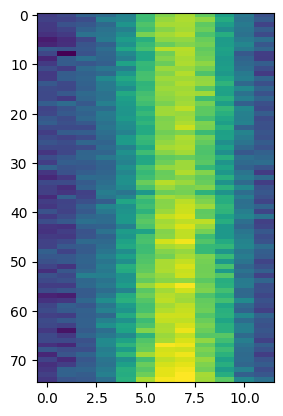

In [57]:
from matplotlib import pyplot

pyplot.imshow(temps, aspect = 1/4)

Above, we've created a rugplot using `pyplot.imshow()` or "image-show," a quick way to plot 2D arrays as if they were images. Warmer colors represent higher temperatures. Can you identify a seasonal pattern across the years?

Next, let's look at average temperature over the years.

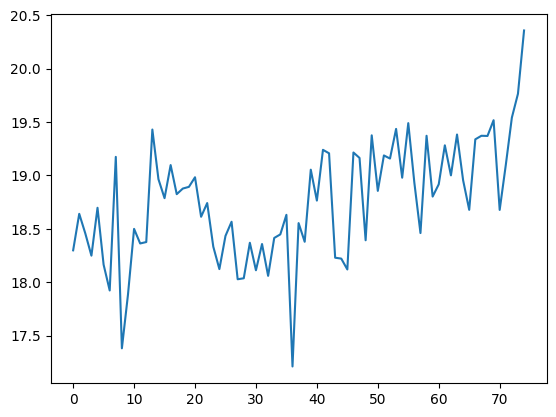

In [58]:
avg_temp = temps.mean(axis = 1)
pyplot.plot(avg_temp)

**Let's try to understand this last example.**

```py
help(pyplot.plot)
```

**How can we improve how this plot looks?**

In [61]:
years = np.arange(1948, 2023)
years

array([1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

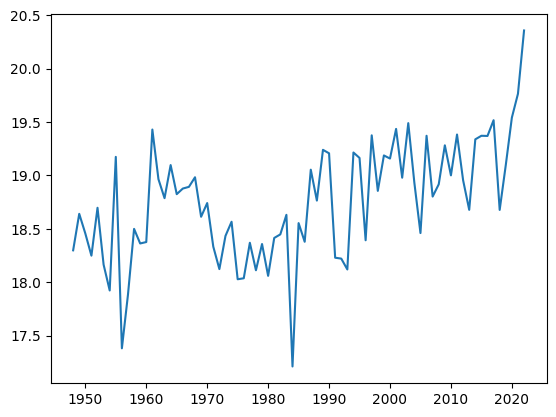

In [62]:
pyplot.plot(years, avg_temp)
pyplot.show()

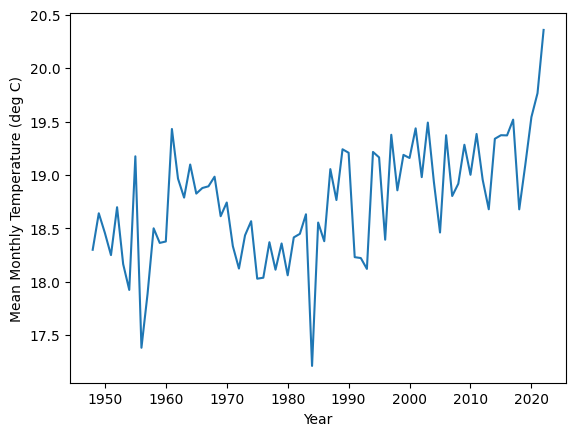

In [63]:
pyplot.plot(years, avg_temp)
pyplot.xlabel('Year')
pyplot.ylabel('Mean Monthly Temperature (deg C)')
pyplot.show()

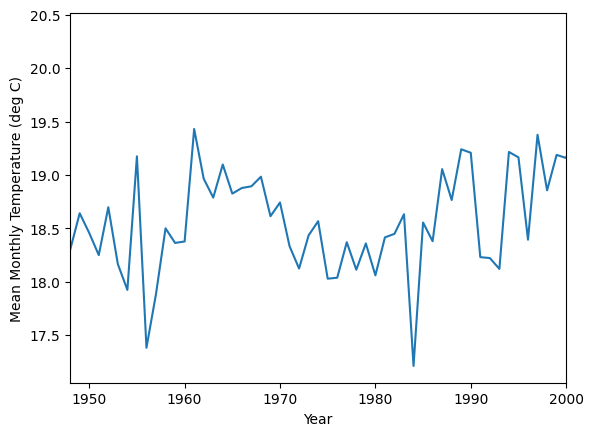

In [64]:
pyplot.plot(years, avg_temp)
pyplot.xlabel('Year')
pyplot.ylabel('Mean Monthly Temperature (deg C)')
pyplot.xlim(1948, 2000)
pyplot.show()

**What other kinds of plots can we make?**

Earlier, when we typed `pyplot.plot(avg_temp)`, we got a line plot. `pyplot` got a 1D array of values and just assumed the data were equally space and that we wanted to connect them with a line.

But `pyplot.plot()` is a more general tool; it can plot any `y` value against any `x` value.

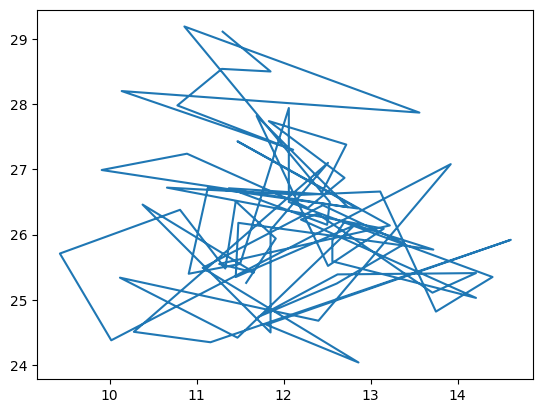

In [65]:
# Plotting July temperatures against January temperatures
pyplot.plot(temps[:,0], temps[:,6])
pyplot.show()

This would look a lot cleaner if we told `pyplot` how to represent the points; and, specifically, to represent them as dots instead of a connected line.

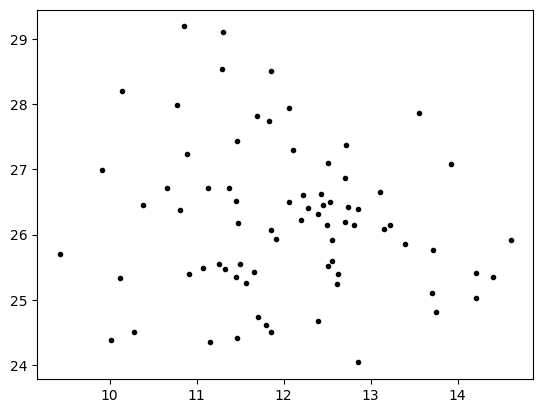

In [66]:
pyplot.plot(temps[:,0], temps[:,6], 'k.')
pyplot.show()

`'k.'` is a formatting string; it's a short-hand notation understood by `pyplot` that codes for two things:

- Show the points as dots, `.` as the dot symbol
- Color the points as black, `k` for "blacK" ("b" represents blue)

[You can see more examples of formats in the `pyplot` documentation.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

Alternatively, we could write:

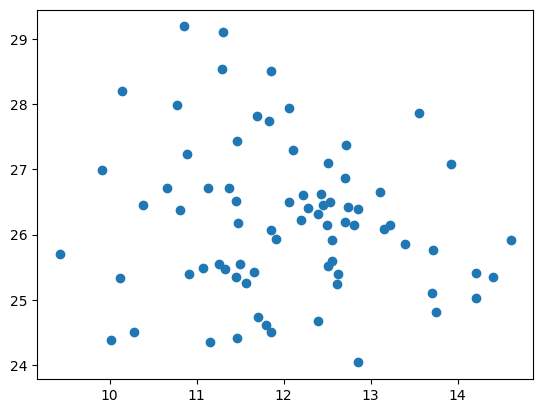

In [67]:
pyplot.scatter(temps[:,0], temps[:,6])
pyplot.show()

---

## More Resources

- [Visual introduction to NumPy](https://jmsevillam.github.io/slides/Python/Numpy.slides.html#/)